# 03 Geometric Machine Learning for Shape Analysis

## E) Unsupervised Learning: Dimension Reduction

$\color{#003660}{\text{Nina Miolane - Assistant Professor}}$ @ BioShape Lab @ UCSB ECE

<center><img src="figs/03_dimred.png" width=950px alt="default"/></center>

# This Unit

- **Unit 3 (Machine Learning): Geometric Machine Learning for Shapes**
  - A) Mean and Covariance
  - B) Classification
  - C) Regression
  - D) Clustering
  - **E) Dimension Reduction**

### Unsupervised Learning in ML

Machine Learning is divided into two principal categories of algorithms: supervised and unsupervised learning algorithms. Both learn from data.

$\color{#EF5645}{\text{Definition}}$: _Unsupervised learning_ refers to the task of discovering any naturally occuring patterns in a dataset of data points $x$. We say that the method is:
- a _clustering_: if we want to find groups (clusters),
- a _dimension reduction_: if we want to find the main sources of data variations.

### Review of Traditional Dimension Reduction


$\color{#EF5645}{\text{Given}}$:
- Dataset $(X_1, . . . , X_n)$ in a data space of dimension $D$
- Integer $d < D$ representing desired lower dimension.

<center><img src="figs/03_pca.png" width=250px alt="default"/></center>

$\rightarrow \color{#EF5645}{\text{Goal}}$: Find $n$ points $(z_1, ..., z_n)$ that:
- belong to a lower-dimensional space of dimension $d < D$,
- are "representative" of the $(X_1, ..., X_n)$.

# This Unit

- **Unit 3 (Machine Learning): Geometric Machine Learning for Shapes**
  - A) Mean and Covariance
  - B) Classification
  - C) Regression
  - D) Clustering
  - **E) Dimension Reduction**
    - Motivation: Shapes of Optical Nerve Heads
    - Dimension Reduction Method 1: Tangent ML
    - Dimension Reduction Method 2: Principal Geodesic Analysis

# Motivation: Dimension Reduction for Optical Nerve Heads

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings("ignore")

### Motivation: Two Groups of Optical Nerve Heads

$\color{#EF5645}{\text{Question}}$: Can we visualize the dataset using the 5 landmarks (not just 3)?

$\color{#EF5645}{\text{Our answer}}$: Dimension reduction on manifold:
- Dataset $(X_1, ..., X_n)$: $n$ nerve shapes represented in Kendall shape space with $5$ landmarks.
- Integer $d=2$ or $d=3$

<center><img src="figs/01_optic_nerves.png" width=400px alt="default"/></center>
<center>Comparison of optic nerve heads in monkeys with and without glaucoma.</center>

In [4]:
import geomstats.datasets.utils as data_utils
nerves, labels, monkeys = data_utils.load_optical_nerves()

Plot two optical shapes: 

In [45]:
two_nerves = nerves[monkeys == 0]
print(two_nerves.shape)

two_labels = labels[monkeys == 0]
print(two_labels)

(2, 5, 3)
[0 1]


In [17]:
label_to_str = {0: "Normal nerve", 1: "Glaucoma nerve"}
label_to_color = {
    0: (102 / 255, 178 / 255, 255 / 255, 1.0),
    1: (255 / 255, 178 / 255, 102 / 255, 1.0),
}

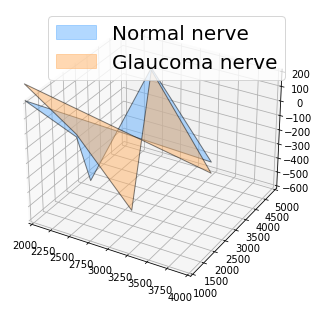

In [47]:
fig = plt.figure(); ax = Axes3D(fig); ax.set_xlim((2000, 4000)); ax.set_ylim((1000, 5000)); ax.set_zlim((-600, 200))

for nerve, label in zip(two_nerves, two_labels):
    x = nerve[:, 0]
    y = nerve[:, 1]
    z = nerve[:, 2]

    verts = [list(zip(x, y, z))]

    poly = Poly3DCollection(verts, alpha=0.5)
    color = label_to_color[int(label)]
    poly.set_color(colors.rgb2hex(color))
    poly.set_edgecolor("k")
    ax.add_collection3d(poly)

patch_0 = mpatches.Patch(color=label_to_color[0], label=label_to_str[0], alpha=0.5)
patch_1 = mpatches.Patch(color=label_to_color[1], label=label_to_str[1], alpha=0.5)
plt.legend(handles=[patch_0, patch_1], prop={"size": 20})
plt.show()

## Refresher: Traditional Principal Component Analysis

$\color{#EF5645}{\text{Principal Component Analysis (PCA)}}$ is an:
- orthogonal projection of the data (belonging to a vector space $\mathbb{R}^D$),
- into a (lower dimensional) linear subspace $\mathbb{R}^d$, $d < D$, 
- so that the variance of the projected data is maximized.

<center><img src="figs/03_pcadims.png" width=800px alt="default"/></center>

$\color{#EF5645}{\text{Notations}}$: $D$ original dimension, $d$ dimension of lower-dimensional subspace.

## PCA: Intuition

What is the 1-dimensional linear subspace that maximizes the variance of the projected data?

<center><img src="figs/03_apca1.png" width=400px alt="default"/></center>

<center><img src="figs/03_apca2.png" width=400px alt="default"/></center>

<center><img src="figs/03_apca3.png" width=400px alt="default"/></center>

## PCA: Mathematical Notations

Find a orthonormal basis $\left\{v_{1}, \ldots, v_{D}\right\}$ of $\mathbb{R}^{D}$, which satisfies the recursive relationship
$$
\begin{gathered}
v_{1}=\underset{\|v\|=1}{\arg \max } \sum_{i=1}^{n}\left(v \cdot x_{i}\right)^{2} \\
v_{k}=\underset{\|v\|=1}{\arg \max } \sum_{i=1}^{n} \sum_{j=1}^{k-1}\left(v_{j} \cdot x_{i}\right)^{2}+\left(v \cdot x_{i}\right)^{2}
\end{gathered}
$$

The $x_i$ are centered at the mean in the equations above.

<center><img src="figs/03_apca3.png" width=300px alt="default"/></center>



- The subspace $V_{k}=\operatorname{span}\left(\left\{v_{1}, \ldots, v_{k}\right\}\right)$ is:
  - the $k$-dimensional subspace 
  - that maximizes the variance 
  - of the data projected to that subspace: $\pi_{V_1}(x_i) = v \cdot x_{i}$
 

$\color{#047C91}{\text{Exercise}}$: Consider the two projections below. Which maximizes the variance?


<center><img src="figs/03_var.png" width=700px alt="default"/></center>

## PCA: Method

The basis $\left\{v_{k}\right\}$ is computed as the set of ordered eigenvectors of the sample covariance matrix of the data.
  
$\color{#6D7D33}{\text{Method}}$: Given data $\left\{X_{1}, \ldots, X_n\right\}$:
- Compute covariance matrix $\Sigma$, where $\quad \overline{\mathbf{x}}=\frac{1}{n} \sum_{i=1}^{n} X_{i}$:

$$\Sigma=\frac{1}{n} \sum_{i=1}^{n}\left(\mathbf{x}_{i}-\overline{\mathbf{x}}\right)(\mathbf{x}_i-\overline{\mathbf{x}})^{T} \quad$$ 
- Compute eigenvectors, eigenvalues of $\Sigma$:
  - Eigenvectors: principal components (PCs)
  - Eigenvalues: orders PCs

## PCA: Explanation

$\color{#EF5645}{\text{Goal (Rewritten)}}$: Maximize $\quad \mathbf{u}^{\top} \mathbf{X X}^{\top} \mathbf{u}$
s.t $\quad \mathbf{u}^{\top} \mathbf{u}=1$, where $\Sigma = \mathbf{X X}^{\top}$

$\color{#6D7D33}{\text{Method}}$:
- Construct Lagrangian $\mathbf{u}^{\top} \mathbf{X X}^{\top} \mathbf{u}-\lambda \mathbf{u}^{\top} \mathbf{u}$
- Set partial derivatives to zero
$$
\mathbf{X X}^{\top} \mathbf{u}-\lambda \mathbf{u}=\left(\mathbf{X X}^{\top}-\lambda \mathrm{I}\right) \mathbf{u}=\mathbf{0}
$$

As $\mathbf{u} \neq \mathbf{0}$ then $\mathbf{u}$ must be an eigenvector of $XX^{\top}$ with eigenvalue $\lambda$

# How Many Principal Components (PCs) ?

Maximum number of PCs:
- For $D$ original dimensions, sample covariance matrix is  $D \times D$, and has up to $D$ eigenvectors.
- Maximum number: $D$ PCs.

Interesting number of PCs:
- Ignore the components of lesser significance, i.e. small eigenvalues.
- Interesting number: $d$ PCs.

<center><img src="figs/03_pcs.png" width=400px alt="default"/></center>


## PCA: Two Interpretations

$\color{#EF5645}{\text{Maximum Variance Direction:}}$
 projection captures maximum variance in the data
$$
\frac{1}{n} \sum_{i=1}^{n}\left(\mathbf{v}^{T} \mathbf{x}_{i}\right)^{2}=\mathbf{v}^{T} \mathbf{X X}^{T} \mathbf{v}
$$

$\color{#EF5645}{\text{Minimum Reconstruction Error:}}$  projection yields minimum mean square error
$$
\frac{1}{n} \sum_{i=1}^{n}\left\|\mathbf{x}_{i}-\left(\mathbf{v}^{T} \mathbf{x}_{i}\right) \mathbf{v}\right\|^{2}
$$

<center><img src="figs/03_orthogonal.png" width=400px alt="default"/></center>


## Dimension Reduction Method 1: Tangent Machine Learning

### Recall: Tangent Space at the Fréchet Mean

The Fréchet mean gives us a way of transforming our non-linear data into vectors:
1. Compute the Fréchet mean $\bar{x}$ of the data points
2. Consider the tangent space $T_\bar{x}M$of the manifold $M$ at $\bar{x}$
3. Compute the Logarithms of the data points at $\bar{x}$

$\rightarrow$ Get a dataset on a vector space, and apply classical machine learning on it.

$\rightarrow$ Here, use `TangentPCA` (tPCA) that projects to the tangent space and performs PCA all in one.

## Example: tPCA on Kendall Shape Spaces

In [17]:
from geomstats.geometry.pre_shape import PreShapeSpace, KendallShapeMetric

m_ambient = 3
k_landmarks = 5

preshape = PreShapeSpace(m_ambient=m_ambient, k_landmarks=k_landmarks)
# matrices_metric = preshape.total_space_metric

nerves_preshape = preshape.projection(nerves)
base_point = nerves_preshape[0]
nerves_shape = preshape.align(point=nerves_preshape, base_point=base_point)
# print(nerves_preshape.shape)
# print(preshape.belongs(nerves_preshape))
# print(np.isclose(matrices_metric.norm(nerves_preshape), 1.0))

1. $\color{#EF5645}{\text{Modelling}}$:

- $\color{#EF5645}{\text{Decide on the model:}}$ We use tangent PCA (tPCA).
- $\color{#EF5645}{\text{Decide on a loss function:}}$ `TangentPCA` comes with its loss function.

In [12]:
kendall_metric = KendallShapeMetric(m_ambient=m_ambient, k_landmarks=k_landmarks)

tpca = TangentPCA(kendall_metric)

2. $\color{#EF5645}{\text{Split dataset into train / test sets:}}$ 
   - Train $X_1, ..., X_{n_\text{train}}$: build the algorithm
   - Test $X_{n_\text{train}+1}, ..., X_n$: assess its performances.

In [14]:
from sklearn.model_selection import train_test_split

train_nerves_shape = nerves_shape[:18]
test_nerves_shape = nerves_shape[18:]

print(train_nerves_shape.shape)
print(test_nerves_shape.shape)


(18, 5, 3)
(4, 5, 3)


3. $\color{#EF5645}{\text{Train:}}$ Build the algorithm

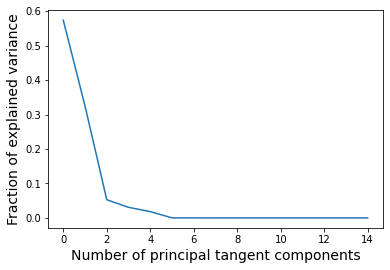

In [15]:
tpca.fit(train_nerves_shape)

plt.plot(tpca.explained_variance_ratio_)
plt.xlabel("Number of principal tangent components", size=14)
plt.ylabel("Fraction of explained variance", size=14);

Two principal components describe around 60% of the variance. We plot the data projected in the tangent space defined by these two principal components.

4. $\color{#EF5645}{\text{Test:}}$ Assess its performances

- We project the whole dataset on the principal components.

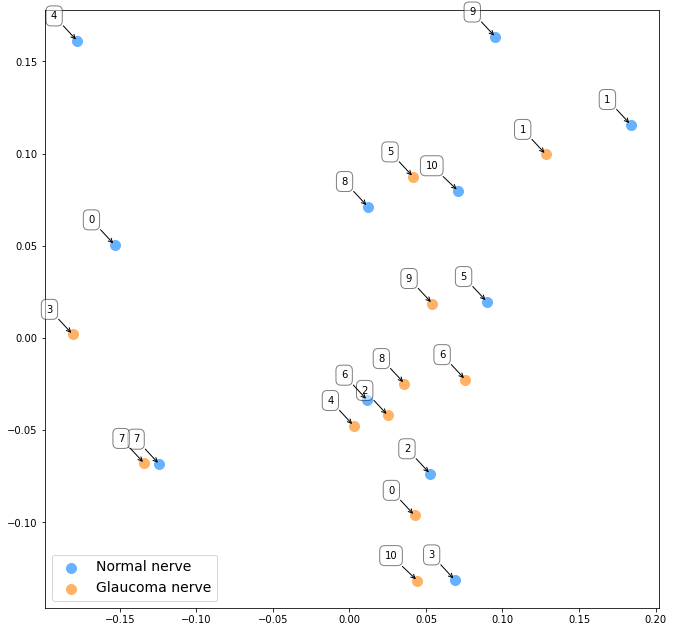

In [18]:
X = tpca.transform(nerves_shape)
plt.figure(figsize=(11, 11))
for label, col in label_to_color.items():
    mask = labels == label
    plt.scatter(X[mask, 0], X[mask, 1], color=col, s=100, label=label_to_str[label])
plt.legend(fontsize=14)
for label, x, y in zip(monkeys, X[:, 0], X[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-20, 20), textcoords="offset points", ha="right", va="bottom", bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.5), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"))
plt.show()

## Dimension Reduction Method 2: Principal Geodesic Analysis


### From Principal Component Analysis to Principal Geodesic Analysis

... and more

<center><img src="figs/03_dimred.png" width=850px alt="default"/></center>

- Variance. Following the work of Fréchet, we define the sample variance of the data as the expected value of the squared Riemannian distance from the mean.
- Geodesic subspaces. The lower-dimensional subspaces in PCA are linear subspaces. For general manifolds we extend the concept of a linear subspace to that of a geodesic submanifold.
- Projection. In PCA the data is projected onto linear subspaces. We define a projection operator for geodesic submanifolds, and show how it may be efficiently approximated.

### From Principal Component Analysis to Principal Geodesic Analysis

$\color{#EF5645}{\text{Principal Component Analysis (PCA)}}$ is an:
- orthogonal projection of the data (belonging to a vector space $\mathbb{R}^D$),
- into a (lower dimensional) linear subspace $\mathbb{R}^d$, $d < D$, 
- so that the variance of the projected data is maximized.

$\color{#EF5645}{\text{Principal Geodesic Analysis (PGA)}}$ is an:
- $\color{#EF5645}{\text{Riemannian orthogonal projection}}$ of the data
- into a (lower dimensional) $\color{#EF5645}{\text{geodesic subspace}}$, 
- so that the variance of the projected data is maximized.

### From Linear Subspace to Geodesic Subspace

$\color{#EF5645}{\text{A submanifold $N$ of a manifold $M$}}$ is a subset of $M$ that is also a manifold.

In general, if $N$ is a submanifold of a manifold $M$, geodesics of $N$ are not necessarily geodesics of $M$.

- $\color{#047C91}{\text{Example}}$: $S^2$ as a submanifold of $\mathbb{R}^3$.

$\color{#EF5645}{\text{A submanifold $H$ of $M$ is said to be geodesic at $x \in H$}}$ if all geodesics of $H$ _passing through $x$_ are also geodesics of $M$. 

- $\color{#047C91}{\text{Example}}$: A linear subspace of $\mathbb{R}^{D}$ is a submanifold geodesic at 0.

$\color{#EF5645}{\text{Remark}}$:  Submanifolds geodesic at $x$ preserve distances to $x.$  This is an essential property for PGA because variance is defined as the average squared distance to the mean. Thus submanifolds geodesic at the mean will be the generalizations of the linear subspaces of PCA.

### From Linear Projection to the Riemannian Projection

$\color{#EF5645}{\text{The projection of a point $x \in M$}}$ onto a geodesic submanifold $H$ of $M$ is defined as the point on $H$ that is nearest to $x$ in Riemannian distance. Thus we define the projection operator $\pi_{H}: M \rightarrow H$ as
$$
\pi_{H}(x)=\underset{y \in H}{\arg \min } d(x, y)^{2}
$$


<center><img src="figs/03_proj.png" width=400px alt="default"/></center>

## PGA: Mathematical Notations

The principal geodesic submanifolds are the images of the $V_{k}$ under the exponential map: $H_{k}=\operatorname{Exp}_{\mu}\left(V_{k}\right)$. The first principal direction is chosen to maximize the projected variance along the corresponding geodesic:
$$
v_{1}=\underset{\|v\|=1}{\arg \max } \sum_{i=1}^{n}\left\|\log _{\mu}\left(\pi_{H}\left(x_{i}\right)\right)\right\|^{2},
$$
where $H=\operatorname{Exp}_{\mu}(\operatorname{span}(\{v\}) \cap U)$.
The remaining principal directions are then defined recursively as
$$
\begin{aligned}
&v_{k}=\underset{\|v\|=1}{\arg \max } \sum_{i=1}^{n}\left\|\log _{\mu}\left(\pi_{H}\left(x_{i}\right)\right)\right\|^{2} \\
&\text { where } H=\operatorname{Exp}_{\mu}\left(\operatorname{span}\left(\left\{v_{1}, \ldots, v_{k-1}, v\right\}\right) \cap U\right) .
\end{aligned}
$$

In [ ]:
- The subspace $V_{k}=\operatorname{span}\left(\left\{v_{1}, \ldots, v_{k}\right\}\right)$ is:
  - the $k$-dimensional subspace 
  - that maximizes the variance 
  - of the data projected to that subspace: $\pi_{V_1}(x_i) = v \cdot x_{i}$

<center><img src="figs/03_pga_alg.png" width=900px alt="default"/></center>


## Example: PGA on the Sphere

In [19]:
!pip install torch

  Using cached torch-1.13.1-cp38-none-macosx_10_9_x86_64.whl (135.4 MB)


In [ ]:
import math
import os
import torch.optim as optim
import matplotlib.pyplot as plt
os.environ['GEOMSTATS_BACKEND'] = 'pytorch'

import geomstats.backend as gs
import geomstats.visualization as visualization
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.learning.frechet_mean import FrechetMean

n = 2
space = Hypersphere(n)
metric = space.metric
gs.random.seed(1)

n_samples = 15
precision = 10
last_meeting_point = gs.array([0., 1., 0.])
samples = space.random_riemannian_normal(
    mean=last_meeting_point,
    precision=precision, n_samples=n_samples)

estimator = FrechetMean(space.metric)
estimator.fit(samples)
mean = estimator.estimate_


def model(x, tangent_vec, base_point):
    times = x[:, None] if metric.default_point_type == 'vector' else \
        x[:, None, None]
    return metric.exp(times * tangent_vec[None], base_point)


def projection(point, tangent_vec, base_point, max_iter=100, tol=1e-6):

    def loss(param):
        projected = model(param, tangent_vec, base_point)
        return gs.sum(metric.squared_dist(point, projected))

    # value_and_grad = gs.autograd.value_and_grad(loss)
    parameter = 0 if point.ndim == 1 else gs.zeros(len(point))
    parameter = parameter.requires_grad_(True)

    opt = optim.Adam([parameter], lr=0.1)

    e = 0
    loss_at_param, criterion = math.inf, math.inf
    for e in range(max_iter):
        loss_at_param = loss(parameter)
        opt.zero_grad()
        loss_at_param.backward(retain_graph=True)
        criterion = parameter.grad.detach().norm() / n_samples
        if criterion <= tol:
            print('Convergence tol reached')
            break
        opt.step()
        if gs.any(gs.isnan(parameter)):
            print('Nan')
    if e == max_iter - 1:
        print(f'Max iter reached with gradient norm: {criterion}')
    print('Final loss:', loss_at_param.detach())
    return model(parameter, tangent_vec, base_point), parameter.detach()


# proj, coefs = projection(target, beta_hat, intercept_hat, max_iter=1000)


def pga(point, base_point, max_iter=100, tol=1e-6):

    def loss(param):
        tangent_vec = space.to_tangent(param, base_point)
        projected_, _ = projection(point, tangent_vec, base_point)
        return gs.sum(metric.squared_dist(point, projected_)) + (
                gs.sum((param - tangent_vec) ** 2)) + gs.maximum(
                gs.sum(param ** 2) - gs.pi ** 2, 0)

    # value_and_grad = gs.autograd.value_and_grad(loss)
    #print(gs.random.rand(size=point[-1].shape))
    parameter = 0 if point.ndim == 1 else gs.zeros(len(point)) #gs.random.rand(point[-1].shape)
    parameter = parameter.requires_grad_(True)

    opt = optim.Adam([parameter], lr=1)

    e = 0
    errors = 0
    loss_at_param, criterion = math.inf, math.inf
    previous_loss = loss_at_param
    previous_parameter = parameter.detach().clone()
    for e in range(max_iter):
        loss_at_param = loss(parameter)
        print('pga_loss', loss_at_param)
        if loss_at_param > previous_loss:
            errors += 1
            if errors == 3:
                print('breaking')
                break

        if gs.any(gs.isnan(loss_at_param)):
            print('NaN')
            break
        opt.zero_grad()
        loss_at_param.backward()
        criterion = parameter.grad.detach().norm() / n_samples
        if criterion <= tol:
            print('Convergence tol reached')
            break
        previous_parameter = parameter.detach().clone()
        previous_loss = loss_at_param
        opt.step()

    if e == max_iter - 1:
        print('Max iter reached in PGA with grad', criterion)
    print('Final loss:', loss_at_param)
    tangent_vec_final = space.to_tangent(previous_parameter, base_point)
    projected, times = projection(point, tangent_vec_final, base_point)
    return projected.detach(), times.detach(), previous_parameter


x =  pga(samples, mean, max_iter=10) # proj, good_times, component =

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
sphere_visu = visualization.Sphere(n_meridians=30)
ax = sphere_visu.set_ax(ax=ax)
sphere_visu.plot_heatmap(ax, lambda x: 1.)

path = metric.geodesic(
    initial_point=mean, initial_tangent_vec=component)
regressed_geodesic = path(
    gs.linspace(0., 1., 100) * gs.pi * 2 / metric.norm(component))

i = 10
ax.plot(
    regressed_geodesic[:, 0],
    regressed_geodesic[:, 1],
    regressed_geodesic[:, 2], c='gray')
sphere_visu.draw(ax, linewidth=1)
logs = space.metric.log(proj.detach(), samples)
geo = space.metric.geodesic(initial_point=samples, initial_tangent_vec=logs)
t = gs.linspace(0, 1, 50)
points = geo(t)
sphere_visu.draw_points(ax, points.reshape(-1, 3), s=1, c='g')
sphere_visu.draw_points(ax, proj.detach().numpy(), marker='o', c='green', s=i)
sphere_visu.draw_points(ax, samples.numpy(), marker='o', c='black', s=i)
sphere_visu.draw_points(ax, gs.array([mean]).numpy(), marker='o', c='r', s=i)
ax.grid(False)
plt.axis('off')

plt.show()

# This Unit

- **Unit 3 (Machine Learning): Geometric Machine Learning for Shapes**
  - A) Mean and Covariance
  - B) Classification
  - C) Regression
  - D) Clustering
  - **E) Dimension Reduction**
    - Motivation: Shapes of Optical Nerve Heads
    - Dimension Reduction Method 1: Tangent ML
    - Dimension Reduction Method 2: Principal Geodesic Analysis